In [1]:
import pandas as pd
import sys, os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from crimebb import *

In [3]:
YEAR="2021"

In [4]:
DATA_PATH="../data/"
CSV_PATH = f"{DATA_PATH}csv/{YEAR}/"

In [5]:
language_to_eval = ["russian", "english", "dutch"]

### Loading data

In [6]:
posts_threads_df = pd.read_csv(f"{CSV_PATH}post_thread_board.csv", sep="\t", low_memory=False)

#### Getting urls

In [7]:
posts_threads_df["urls_mentioned"] = posts_threads_df["content"].apply(lambda x: re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', x))
posts_threads_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
0,34,10,114,9,Algol,1174,1761,0,Адрес хоть дай...Первый раз слышу о таком ...,{},2002-05-31 06:36:00-03,forum.antichat.ru,Веб-уязвимости,ВЗЛОМ ФОРУМОВ,"{'russian': 3, 'english': 0, 'dutch': 0}",russian,3,[]
1,637,10,114,113,Algol,1174,1761,0,Кстати этот чат ломается ...,{},2002-08-05 16:15:00-03,forum.antichat.ru,Веб-уязвимости,Есть вопрос на счёт чата,"{'russian': 1, 'english': 0, 'dutch': 0}",russian,1,[]
2,710,10,114,137,Algol,1174,1761,0,Чесно говоря это действительно большая редкост...,{},2002-08-12 08:08:00-03,forum.antichat.ru,Веб-уязвимости,Клиенты для чата...,"{'russian': 1, 'english': 0, 'dutch': 0}",russian,1,[]
3,491,10,114,99,GPT cd-r74xl 24x,1548,1,0,"Сорри, этт я неправильно указал ихний адрес. И...",{},2002-07-19 09:30:00-03,forum.antichat.ru,Веб-уязвимости,Всевидящее Око на http://chat.userline.ru,"{'russian': 1, 'english': 0, 'dutch': 0}",russian,1,[http://chat.userline.ru[http://chat.userline....
4,571,10,46,120,iRedX,1968,123,9,Скоро будет обновление,{},2002-07-31 23:01:00-03,forum.antichat.ru,Болталка,Зацените сайт,"{'russian': 1, 'english': 0, 'dutch': 0}",russian,1,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369010,42116,20,49,8611,tolerance2,24965,14,0,What is that? I dont have javascript enabled s...,{},2019-08-06 21:00:00-03,torum6uvof666pzw.onion,General Discussions,Free stuff,"{'russian': 0, 'english': 7, 'dutch': 1}",english,7,[]
3369011,42124,20,62,8454,mrkcuf,22583,52,0,***LINK***lovelycloud[./memberlist.php?mode=vi...,{},2019-08-06 21:00:00-03,torum6uvof666pzw.onion,Marketplace Discussions,KEYLOGGER,"{'russian': 0, 'english': 19, 'dutch': 1}",english,19,[]
3369012,42129,20,62,8454,rIA,15407,27,0,I wrote some keyloggers for android if you are...,{},2019-08-06 21:00:00-03,torum6uvof666pzw.onion,Marketplace Discussions,KEYLOGGER,"{'russian': 0, 'english': 6, 'dutch': 0}",english,6,[]
3369013,42134,20,62,8454,lovelycloud,25064,7,0,ok..,{},2019-08-06 21:00:00-03,torum6uvof666pzw.onion,Marketplace Discussions,KEYLOGGER,"{'russian': 0, 'english': 0, 'dutch': 0}",russian,0,[]


In [8]:
posts_threads_df[posts_threads_df["urls_mentioned"].str.len()>0][["post_id","urls_mentioned"]]

,post_id,urls_mentioned
3,491,[http://chat.userline.ru[http://chat.userline....
6,570,[http://redx.narod.ru[http://redx.narod.ru]***...
8,654,[http://banya.nordnet.ru/[http://banya.nordnet...
15,432,[http://antichat.ru/crackchat/chatlist.xml[htt...
30,1007,[http://www.0day.ru]***LINK***]
...,...,...
3368946,41996,[http://empiremktxgjovhm.onion]
3368956,42015,[http://torum6uvof666pzw.onion/viewtopic.php?f...
3368960,42025,[http://www.libpng.org/pub/png/apps/pngcheck.h...
3368980,42062,[https://www.zataz.com/stockage-pirate-nouvell...


#### Siemens references

In [9]:
keywords=["siemens", "siemens s7", "simatic s7", "s7", "simatic"]

pattern = '|'.join(keywords)

In [10]:
siemens_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
siemens_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
272,46071,10,21,7202,silveran,16614,778,2,Siemens C25/Siemens C35i \nAll siemens phones:...,{},2005-06-15 03:45:00-03,forum.antichat.ru,Электроника и Фрикинг,Секреты Gsm,"{'russian': 1, 'english': 46, 'dutch': 4}",english,46,[]
2130,2594,10,114,494,Бухой Дамбер,682,91,0,"для 4-го, попробуй эти:\n\nDBD02DA0-g92Wg7gS-3...",{},2003-02-11 22:38:00-02,forum.antichat.ru,Веб-уязвимости,Бухой Дамбер ты это должен знать!!!,"{'russian': 2, 'english': 0, 'dutch': 0}",russian,2,[]
3300,3954,10,46,545,Бухой Дамбер,682,91,0,"в будущем, попробуй поискать что-то на форумах...",{},2003-04-01 18:03:00-03,forum.antichat.ru,Болталка,МСТЯ МОЯ СТРАШНА,"{'russian': 4, 'english': 0, 'dutch': 0}",russian,4,[http://forum.siemens-club.ru[http://forum.sie...
8940,11944,10,46,2028,Че Гевара,945,1054,8,"Если у вашего друга Siemens , то пришлите ему:...",{},2004-06-08 06:48:00-03,forum.antichat.ru,Болталка,Смс-приколы,"{'russian': 4, 'english': 0, 'dutch': 0}",russian,4,[]
9714,12671,10,21,2179,Algol,1174,1761,0,Эээ...у меня Siemens S55\nНу мобила как мобила...,{},2004-06-30 09:00:00-03,forum.antichat.ru,Электроника и Фрикинг,Siemens,"{'russian': 31, 'english': 0, 'dutch': 0}",russian,31,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368610,41489,20,49,7874,SqlDox,24590,18,0,***LINK***JohnRichards[./memberlist.php?mode=v...,{},2019-08-04 21:00:00-03,torum6uvof666pzw.onion,General Discussions,SANS / OS / eLearnSec Courses,"{'russian': 0, 'english': 44, 'dutch': 4}",english,44,[http://www.mediafire.com/download/b71c8v6tbqx...
3368628,41516,20,35,8498,xuser159,21706,17,0,Hello guys I have heared about ss7 exploit and...,{},2019-08-04 21:00:00-03,torum6uvof666pzw.onion,Hardware,ss7 exploit,"{'russian': 0, 'english': 15, 'dutch': 2}",english,15,[]
3368635,41526,20,35,8498,linuxcumtom33,23289,142,0,***LINK***xuser159[./memberlist.php?mode=viewp...,{},2019-08-04 21:00:00-03,torum6uvof666pzw.onion,Hardware,ss7 exploit,"{'russian': 0, 'english': 18, 'dutch': 3}",english,18,[]
3368697,41612,20,35,8498,sarasota,5963,7,0,***LINK***xuser159[./memberlist.php?mode=viewp...,{},2019-08-04 21:00:00-03,torum6uvof666pzw.onion,Hardware,ss7 exploit,"{'russian': 0, 'english': 21, 'dutch': 4}",english,21,[]


In [11]:
siemens_content = ' '.join(siemens_df["content"])

In [12]:
siemens_dict = getFrequencyDictForText(siemens_content, language_to_eval=language_to_eval)

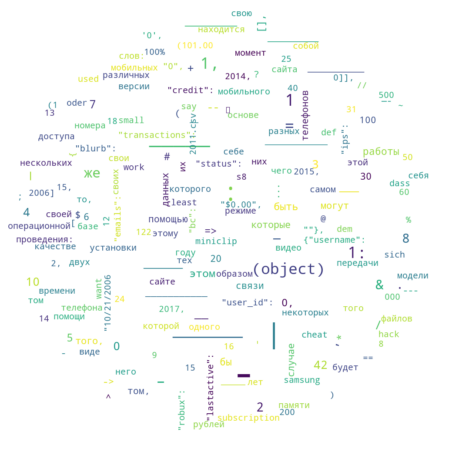

In [13]:
showWordCloud(siemens_dict)

#### Port references

In [14]:
keywords=["102", "port102", "port:102", "bacnet", "port"]

pattern = '|'.join(keywords)

In [15]:
port102_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
port102_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
21,310,10,41,49,chester,2440,5,0,scanneri portov ping i td i tp,{},2002-06-21 10:17:00-03,forum.antichat.ru,Безопасность и Анонимность,Scanneri,"{'russian': 0, 'english': 1, 'dutch': 0}",english,1,[]
156,209,10,114,35,Algol,1174,1761,0,Можно ...\nЗапрос должен выглядеть так:\n</spa...,{},2002-06-13 11:52:00-03,forum.antichat.ru,Веб-уязвимости,Подделка http запросов,"{'russian': 8, 'english': 0, 'dutch': 0}",russian,8,[http://www.dirfax.narod.ru/soft/icq2002.3727r...
217,350,10,114,60,chester,2440,5,0,Apache Server Status for ***LINK***www.coolscr...,{},2002-06-26 22:31:00-03,forum.antichat.ru,Веб-уязвимости,Chto ter ya s etim mogu sdelat',"{'russian': 0, 'english': 15, 'dutch': 2}",english,15,"[http://www.coolscript.net]***LINK***, http://..."
377,577,10,46,91,iRedX,1968,123,9,Эту проблему можно решить просто\nЗарегистриру...,{},2002-07-31 23:41:00-03,forum.antichat.ru,Болталка,Убрать рекламу с narod,"{'russian': 8, 'english': 0, 'dutch': 0}",russian,8,"[http://www.dot.tk/vc00100.html]***LINK***, ht..."
434,669,10,114,138,Algol,1174,1761,0,Все прекрасно работает. \nНе знаю что у тебя н...,{},2002-08-09 06:29:00-03,forum.antichat.ru,Веб-уязвимости,"Algol, i need your help!!!","{'russian': 14, 'english': 2, 'dutch': 0}",russian,14,"[http://chat.bratsk.ru/talker.cgi, http://chat..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368887,41916,20,49,8596,dejavie21,21413,13,0,***LINK***etphonehome[./memberlist.php?mode=vi...,{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,General Discussions,What are things you should know to avoid going...,"{'russian': 0, 'english': 50, 'dutch': 6}",english,50,[]
3368895,41935,20,49,8534,HedonicPareidolia,18682,28,0,***LINK***Donkey[./memberlist.php?mode=viewpro...,{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,General Discussions,On Video Games Causing Mass Shootings,"{'russian': 0, 'english': 49, 'dutch': 6}",english,49,[]
3368936,41981,20,35,8488,J.Galt,25087,10,0,In my mind a Closed Circuit Television (CCTV) ...,{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,Hardware,how to break a CCTV camera?,"{'russian': 0, 'english': 26, 'dutch': 3}",english,26,[]
3368939,41983,20,62,8178,hellbinder,16956,39,0,***LINK***Sachind97[./memberlist.php?mode=view...,{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,Marketplace Discussions,Fake USA passport,"{'russian': 0, 'english': 19, 'dutch': 3}",english,19,[]


In [16]:
port102_content = ' '.join(port102_df["content"])

In [17]:
port102_dict = getFrequencyDictForText(port102_content, language_to_eval=language_to_eval)

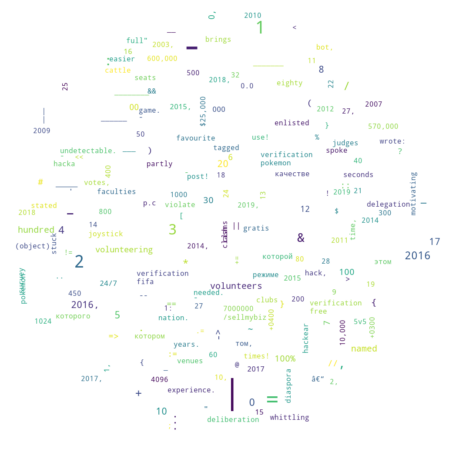

In [18]:
showWordCloud(port102_dict)

#### CVSS references

In [19]:
keywords=["cvss"]

pattern = '|'.join(keywords)

In [20]:
cvss_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
cvss_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
212634,363690,10,74,40140,Legalz,36586,7,0,"Привет, всем. \nЯ начинающий, но уже немного п...",{},2007-05-15 13:18:00-03,forum.antichat.ru,Уязвимости,"Нашел уязвимость, как воспользоваться? Помогите","{'russian': 25, 'english': 2, 'dutch': 0}",russian,25,[]
315817,549709,10,74,46016,Masyoka,44398,2,0,Хеллоу всем =D\n\nВопрос такой:\nсканил один с...,{},2008-01-06 07:08:00-02,forum.antichat.ru,Уязвимости,Ваши вопросы по уязвимостям.,"{'russian': 31, 'english': 3, 'dutch': 0}",russian,31,[]
350155,607872,10,74,63176,Евгений Минаев,44793,57,159,Категорирование критичности опубликованных уяз...,{},2008-03-01 10:42:00-03,forum.antichat.ru,Уязвимости,Оценка риска уязвимости,"{'russian': 22, 'english': 0, 'dutch': 0}",russian,22,"[http://nvd.nist.gov/cvss.cfm?calculator, http..."
616480,1076437,10,37,360690,[R]eD,26157,72,0,Помогите расшифровать:\n\nPHP:\n\n<?php\neval(...,{},2009-01-23 15:35:00-02,forum.antichat.ru,"PHP, PERL, MySQL, JavaScript",[php] Новичкам: задаем вопросы,"{'russian': 5, 'english': 0, 'dutch': 0}",russian,5,[]
930917,1650702,10,23,153226,Adekvatnyj,101997,59,-3,***IMG***[proxy.php?image=http%3A%2F%2Fcyberse...,{},2009-11-02 15:32:00-02,forum.antichat.ru,Мировые новости. Обсуждения.,"Расселение хакеров, или ""Microsoft опубликовал...","{'russian': 51, 'english': 0, 'dutch': 0}",russian,51,[http://cybersecurity.ru/crypto/81388.html]
1037230,1862467,10,41,173936,crash4x4,112400,14,0,Classification\n\nRisk: – \nCVSS: CVSS2#AV:N/A...,{},2010-01-29 17:34:00-02,forum.antichat.ru,Безопасность и Анонимность,BugBear.B BackDoor,"{'russian': 0, 'english': 17, 'dutch': 1}",english,17,[http://www.f-secure.com/v-descs/bugbear_b.shtml]
1421096,2517684,10,23,253792,Law,141034,268,6,Компания Research In Motion выпустила обновлен...,{},2011-01-17 08:24:00-02,forum.antichat.ru,Мировые новости. Обсуждения.,RIM устраняет уязвимости в операционной систем...,"{'russian': 35, 'english': 1, 'dutch': 1}",russian,35,[http://www.xakep.ru/post/54541/]
1588384,2772846,10,74,46016,lukmus,104387,448,23,"PostgreSQL 9.0.3 on i386-portbld-freebsd8.2, c...",{},2011-07-31 11:55:00-03,forum.antichat.ru,Уязвимости,Ваши вопросы по уязвимостям.,"{'russian': 14, 'english': 9, 'dutch': 1}",russian,14,[]
1592238,2778561,10,41,287239,Momp,161775,7,0,Nessus выдал:\n\nCode:\nSynopsis: It is possib...,{},2011-08-04 18:12:00-03,forum.antichat.ru,Безопасность и Анонимность,Вопрос по nessus и metasploit,"{'russian': 5, 'english': 21, 'dutch': 3}",english,21,[http://www.samba.org/samba/security/CVE-2007-...
1600068,2790311,10,23,288783,d3l3t3,147105,1877,10,Компания ISC (Internet Systems Consortium) вып...,{},2011-08-13 18:19:00-03,forum.antichat.ru,Мировые новости. Обсуждения.,ISC исправила критические уязвимости в DHCP се...,"{'russian': 20, 'english': 0, 'dutch': 0}",russian,20,[http://anti-malware.ru/news/2011-08-13/4495]


In [21]:
cvss_content = ' '.join(cvss_df["content"])

In [22]:
cvss_dict = getFrequencyDictForText(cvss_content, language_to_eval=language_to_eval)

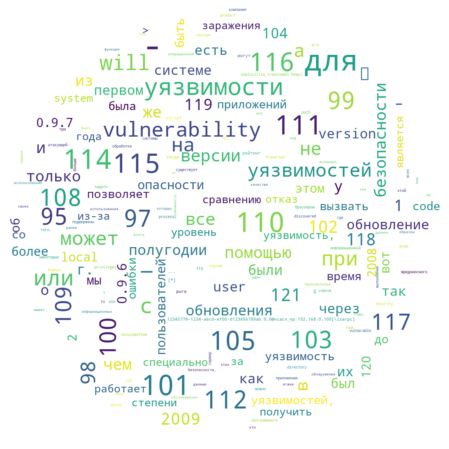

In [23]:
showWordCloud(cvss_dict)

#### EPSS references

In [24]:
keywords=["epss"]

pattern = '|'.join(keywords)

In [25]:
epss_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
epss_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
751651,1313485,10,74,38443,RulleR,58462,180,313,Code:\nhttp://ezonet.ru/reports.php?page=../in...,{},2009-06-06 08:41:00-03,forum.antichat.ru,Уязвимости,PHP Иньекции,"{'russian': 0, 'english': 0, 'dutch': 0}",russian,0,[http://ezonet.ru/reports.php?page=../index.ph...
1621804,2824164,10,24,293056,Kandi,104415,364,0,***CITING***[about:blank]***CITING***Можно спр...,{},2011-09-09 17:14:00-03,forum.antichat.ru,"С/С++, C#, Delphi, .NET, Asm",Требуется процедура парсера емэйлов!,"{'russian': 14, 'english': 5, 'dutch': 0}",russian,14,[http://forum.vingrad.ru/articles/topic-213075...
2026498,3466196,10,76,136449,b82a,113734,160,25,db6c2b03efef9ac28a6f96548423ec38:VJkWSgPoSDzcr...,{},2013-04-03 22:26:00-03,forum.antichat.ru,"Криптография, расшифровка хешей",Расшифровка hash. Part2 (SALT),"{'russian': 0, 'english': 0, 'dutch': 0}",russian,0,[]
2235731,3867298,10,76,355101,DezMond™,47856,2152,224,$P$CMAGyZzeYdhDzosPevct5Km4dLJ.VA/\n$P$CcD1ch5...,{},2015-07-11 14:22:00-03,forum.antichat.ru,"Криптография, расшифровка хешей",Платная расшифровка hash,"{'russian': 1, 'english': 0, 'dutch': 0}",russian,1,[]
2351891,4073636,10,76,424564,HORUS3,302033,3,0,помогите пожалуйста с wordpress! всем спасибо!...,{},2017-04-17 17:22:00-03,forum.antichat.ru,"Криптография, расшифровка хешей","Расшифровка hash. Part3 (WordPress, PhpBB3, DE...","{'russian': 1, 'english': 7, 'dutch': 1}",english,7,[]
2600021,948993711,19,29,948993711,vendor,39199,0,0,https://linx.li/possiblepssendingdoj.jpg\n\n**...,{},2019-11-05 23:35:33.863159-03,dreadditevelidot.onion,Xanax,One Last Fud I was Sent about PS,"{'russian': 0, 'english': 18, 'dutch': 4}",english,18,[https://linx.li/possiblepssendingdoj.jpg]
3129341,189316,24,6,145,e1011,2585,0,1,-----BEGIN PGP PUBLIC KEY BLOCK-----Version: G...,{},2016-10-01 11:00:00-03,lwplxqzvmgu43uff.onion,Оффтопик,Делимся PGP/GPG ключами,"{'russian': 0, 'english': 0, 'dutch': 0}",russian,0,[]
3293668,88806,2,1,11820,DogAteMyAcid,20737,151,40,...cont...QuoteAnother area unique to our situ...,{},2015-08-01 18:06:45-03,thehub7xbw4dc5r2.onion,General Discussion,The Second Realm: Book on Strategy - By Smuggler,"{'russian': 0, 'english': 110, 'dutch': 9}",english,110,[]
3305602,130570,2,16,16801,publius568,30845,37,-3,-----BEGIN PGP SIGNED MESSAGE-----Hash: SHA256...,{},2015-12-27 02:49:55-02,thehub7xbw4dc5r2.onion,Vendor Review,New weed vendor - publius568 for verification,"{'russian': 0, 'english': 6, 'dutch': 1}",english,6,"[http://outfor6jwcztwbpd.onion, http://outfor6..."
3314999,163907,2,74,18682,ob01,36899,77,-10,-----BEGIN PGP SIGNED MESSAGE-----Hash: SHA512...,{},2017-09-28 22:48:54-03,thehub7xbw4dc5r2.onion,For Beginners,Where are people buying Ketamine?,"{'russian': 0, 'english': 4, 'dutch': 1}",english,4,[http://grams7enufi7jmdl.onion/infodesk/vendor...


In [26]:
epss_content = ' '.join(epss_df["content"])

In [27]:
epss_dict = getFrequencyDictForText(epss_content, language_to_eval=language_to_eval)

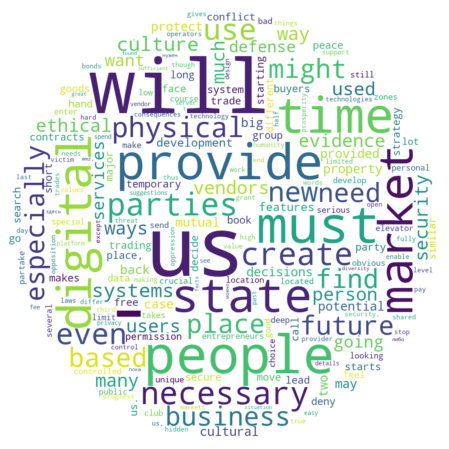

In [28]:
showWordCloud(epss_dict)

#### FUD references

In [29]:
keywords=["fud"]

pattern = '|'.join(keywords)

In [30]:
fud_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
fud_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
4073,4839,10,46,736,Matias,1786,22,0,Или еще можешь скачать с сайта ***LINK***http:...,{},2003-05-13 15:35:00-03,forum.antichat.ru,Болталка,Help!!!!,"{'russian': 5, 'english': 0, 'dutch': 0}",russian,5,[http://www.webportal.fud.ru[http://www.webpor...
5743,6747,10,13,1034,$TreaM,1081,63,0,Думаю ipdbrute тебе поможет бери его тут ***LI...,{},2003-09-29 03:16:00-03,forum.antichat.ru,"Skype, IRC, ICQ, Jabber и другие IM","Подскажите, а?","{'russian': 27, 'english': 0, 'dutch': 0}",russian,27,[http://ifud.ru/ipd/IPDbrute2.zip[http://ifud....
6222,7345,10,13,1245,$TreaM,1081,63,0,Ipdbrute биг фак или как угнать асю?\nНадоело ...,{},2003-11-15 03:21:00-02,forum.antichat.ru,"Skype, IRC, ICQ, Jabber и другие IM",Ipdbrute2/udc2 pro - БИГ ФАК,"{'russian': 85, 'english': 3, 'dutch': 0}",russian,85,[https://web.icq.com/secure/password/[https://...
6385,7554,10,13,1299,Guest,-1,-1,-1,1000110;rdhoovster@flash.net\n1000111;wkhlum@y...,{},2003-12-05 16:04:00-02,forum.antichat.ru,"Skype, IRC, ICQ, Jabber и другие IM",База &nbsp;семизнак:мыло,"{'russian': 1, 'english': 28, 'dutch': 14}",english,28,[]
8339,10479,10,13,1771,$TreaM,1081,63,0,Или шота в это роде =)) Раньше клоны показывал...,{},2004-04-19 11:02:00-03,forum.antichat.ru,"Skype, IRC, ICQ, Jabber и другие IM",как видеть invisible-user в аське.патч?,"{'russian': 8, 'english': 0, 'dutch': 0}",russian,8,[http://www.ifud.ru/dfm/DFMa.exe[http://www.if...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368103,40624,20,36,8030,beiaofeg1,23491,25,0,***LINK***linuxcumtom33[./memberlist.php?mode=...,{},2019-08-01 21:00:00-03,torum6uvof666pzw.onion,Cryptography / Malware,Binder?,"{'russian': 0, 'english': 19, 'dutch': 4}",english,19,[]
3368105,40626,20,36,8030,linuxcumtom33,23289,142,0,***LINK***beiaofeg1[./memberlist.php?mode=view...,{},2019-08-01 21:00:00-03,torum6uvof666pzw.onion,Cryptography / Malware,Binder?,"{'russian': 0, 'english': 25, 'dutch': 5}",english,25,[]
3368750,41690,20,36,8311,torrentmaster,22853,100,0,are you sure crypt FUD?\nthen upload your app ...,{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,Cryptography / Malware,help hacking tech,"{'russian': 0, 'english': 5, 'dutch': 0}",english,5,[]
3368752,41692,20,36,8030,torrentmaster,22853,100,0,***LINK***linuxcumtom33[./memberlist.php?mode=...,{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,Cryptography / Malware,Binder?,"{'russian': 0, 'english': 27, 'dutch': 5}",english,27,[]


In [31]:
fud_content = ' '.join(fud_df["content"])

In [32]:
fud_dict = getFrequencyDictForText(fud_content, language_to_eval=language_to_eval)

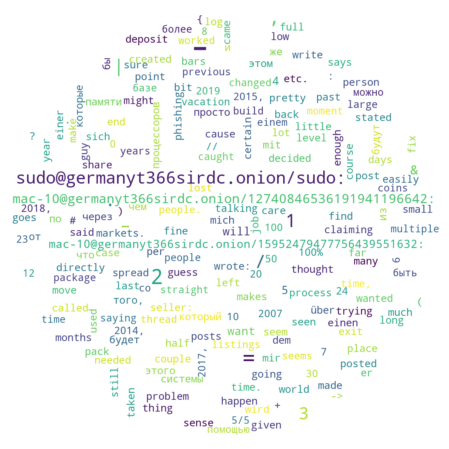

In [33]:
showWordCloud(fud_dict)

#### SHODAN references

In [34]:
keywords=["shodan"]

pattern = '|'.join(keywords)

In [35]:
shodan_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
shodan_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
963731,1717658,10,72,159436,Flins,105012,4,0,***CITING***[about:blank]***CITING***this engi...,{},2009-11-26 21:25:00-02,forum.antichat.ru,Forum for discussion of ANTICHAT,Shodan,"{'russian': 0, 'english': 19, 'dutch': 1}",english,19,[http://shodan.surtri.com/]
1023180,1834532,10,46,171410,Paul_Eckman,103511,58,10,Андерса Фридена так и не угадал. А называл пер...,{},2010-01-17 10:24:00-02,forum.antichat.ru,Болталка,"Джин, угадывающий всё.","{'russian': 12, 'english': 0, 'dutch': 0}",russian,12,[]
1028409,1844665,10,72,159436,Paul_Eckman,103511,58,10,It seems to me that SHODAN becomes just a lege...,{},2010-01-22 06:05:00-02,forum.antichat.ru,Forum for discussion of ANTICHAT,Shodan,"{'russian': 0, 'english': 6, 'dutch': 1}",english,6,[http://shodan.awardspace.com/]
1028469,1844795,10,72,159436,altblitz,87175,3027,230,***CITING***[about:blank]***CITING***SHODAN - ...,{},2010-01-22 07:33:00-02,forum.antichat.ru,Forum for discussion of ANTICHAT,Shodan,"{'russian': 0, 'english': 5, 'dutch': 1}",english,5,[]
1455612,2568831,10,74,257331,HIMIKAT,31697,2726,402,Rapid7 Online Scan\n***LINK***www.rapid7.com/n...,{},2011-02-23 23:09:00-03,forum.antichat.ru,Уязвимости,Ссылки на hack сервисы,"{'russian': 44, 'english': 0, 'dutch': 0}",russian,44,[http://www.rapid7.com/nexposefulltrial.jsp]**...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368640,41532,20,25,8506,ernestmiller,22469,42,0,Would I buy me right in thinking its a simple ...,{},2019-08-04 21:00:00-03,torum6uvof666pzw.onion,Social Engineering,Simple Social Engineering newish to the field,"{'russian': 0, 'english': 22, 'dutch': 3}",english,22,[]
3368704,41619,20,32,8053,JohnWayne,6967,15,0,whats shodan? can you give me a link pls? tnx.,{},2019-08-04 21:00:00-03,torum6uvof666pzw.onion,Networking / Wireless,information about an IP,"{'russian': 0, 'english': 4, 'dutch': 1}",english,4,[]
3368730,41657,20,25,8532,paininear,9008,17,0,"So I get an fb message from someone I know, it...",{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,Social Engineering,counter-phishing a sloppy phisher,"{'russian': 0, 'english': 48, 'dutch': 8}",english,48,[]
3368743,41673,20,32,8053,WizardX,4799,159,0,***LINK***JohnWayne[./memberlist.php?mode=view...,{},2019-08-05 21:00:00-03,torum6uvof666pzw.onion,Networking / Wireless,information about an IP,"{'russian': 0, 'english': 10, 'dutch': 4}",english,10,"[https://www.shodan.io/, https://en.wikipedia...."


In [36]:
shodan_content = ' '.join(shodan_df["content"])

In [37]:
shodan_dict = getFrequencyDictForText(shodan_content, language_to_eval=language_to_eval)

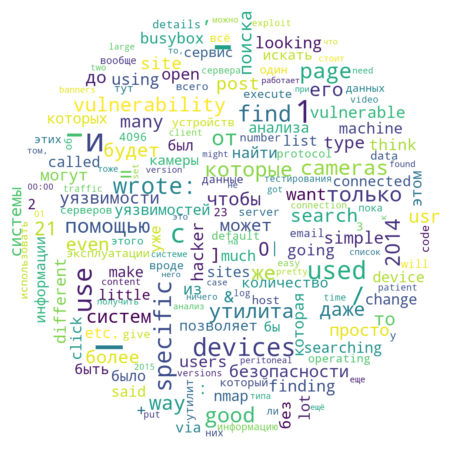

In [38]:
showWordCloud(shodan_dict)

#### CVE references

In [39]:
keywords=["cve ", "cve-"]

pattern = '|'.join(keywords)

In [40]:
cve_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
cve_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
52647,96068,10,16,12520,NeMiNeM,18692,483,201,Topic : phpBB 2.0.19 XSS\n\nSecurityAlert Id :...,{},2006-01-05 20:50:00-02,forum.antichat.ru,Уязвимости CMS/форумов,Новая XSS на форуме phpBB 2.0.19,"{'russian': 10, 'english': 53, 'dutch': 6}",english,53,"[http://www.phpbb.com/about.php., http://secur..."
83467,147613,10,37,18262,Ponchik,18829,760,311,Пищит! Exploit.JS.CVE-2006-1359.m,{},2006-05-06 03:34:00-03,forum.antichat.ru,"PHP, PERL, MySQL, JavaScript",Html скрипт загрузки вируса на удалёный комп!,"{'russian': 0, 'english': 1, 'dutch': 0}",english,1,[]
114968,197747,10,41,24423,melco,19011,16,2,#!/bin/sh\n# Exploit for Apache mod_rewrite of...,{},2006-09-25 09:47:00-03,forum.antichat.ru,Безопасность и Анонимность,"Apache < 1.3.37, 2.0.59, 2.2.3 (mod_rewrite) R...","{'russian': 6, 'english': 23, 'dutch': 3}",english,23,[http://milw0rm.org/exploits/2237]***LINK***]
121264,208425,10,16,25540,_-[A.M.D]HiM@S-_,21104,444,696,PHP:\n\nDetails: SecurityAlert \n Topic : ph...,{},2006-10-17 19:49:00-03,forum.antichat.ru,Уязвимости CMS/форумов,Очередной вопрос об уязвимостях в phpbb 2.0.19,"{'russian': 0, 'english': 55, 'dutch': 5}",english,55,"[http://www.phpbb.com/about.php., http://secur..."
160356,269551,10,72,31610,Sn@k3,23577,1138,90,Flaws in Web applications boosted the bug coun...,{},2007-01-18 22:42:00-02,forum.antichat.ru,Forum for discussion of ANTICHAT,Vulnerability tallies surged in 2006,"{'russian': 0, 'english': 68, 'dutch': 5}",english,68,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364106,34434,20,36,6845,apdev11,20481,108,0,find on github\n\nhttps://github.com/offensive...,{},2019-07-12 21:00:00-03,torum6uvof666pzw.onion,Cryptography / Malware,Where is the exploit libary site like 0day on DW?,"{'russian': 0, 'english': 1, 'dutch': 0}",english,1,[https://github.com/offensive-security/exploit...
3366237,37669,20,24,7714,mandrakethemagician,21348,8,0,***LINK***ag0ria[./memberlist.php?mode=viewpro...,{},2019-07-24 21:00:00-03,torum6uvof666pzw.onion,Website Pentesting,How do I exploit found vulnerability?,"{'russian': 0, 'english': 33, 'dutch': 3}",english,33,[]
3366256,37691,20,24,7714,None,-1,0,0,***LINK***mandrakethemagician[./memberlist.php...,{},2019-07-24 21:00:00-03,torum6uvof666pzw.onion,Website Pentesting,How do I exploit found vulnerability?,"{'russian': 0, 'english': 37, 'dutch': 3}",english,37,[]
3366426,37930,20,49,7803,torrentmaster,22853,100,0,SUDO KILLER is a tool which help to abuse SUDO...,{},2019-07-25 21:00:00-03,torum6uvof666pzw.onion,General Discussions,Identify & Exploit Sudo [Tool: SUDO KILLER],"{'russian': 0, 'english': 26, 'dutch': 4}",english,26,[https://github.com/TH3xACE/SUDO_KILLER]


In [41]:
cve_content = ' '.join(cve_df["content"])

In [42]:
cve_dict = getFrequencyDictForText(cve_content, language_to_eval=language_to_eval)

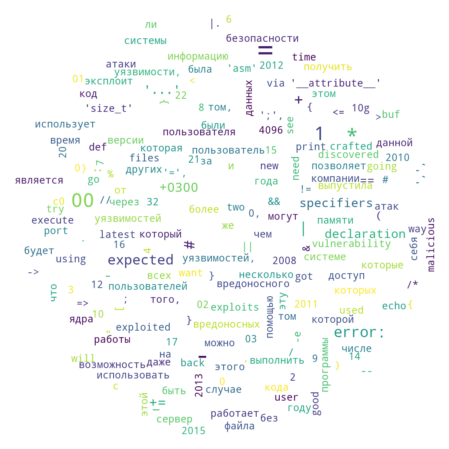

In [43]:
showWordCloud(cve_dict)

#### COVID References

In [44]:
keywords=["covid", "covid19", "covid-19", "sars", "sars-cov-2", "sars-cov"]

pattern = '|'.join(keywords)

In [45]:
covid_df = posts_threads_df[posts_threads_df["content"].str.lower().str.contains(pattern)]
covid_df

,post_id,site_id,board_id,thread_id,username,user_id,user_num_posts,user_reputation,content,quoted_post_ids,post_data_creation,site_name,board_title,thread_title,language_content,language_detected,language_score,urls_mentioned
336039,584797,10,76,54936,Mr. P.S.,37015,183,35,Хеши расшифрованные с http://md5.xek.cc/noncra...,{},2008-02-04 19:24:00-02,forum.antichat.ru,"Криптография, расшифровка хешей",Античат online crack md5 service (тестим!),"{'russian': 1, 'english': 0, 'dutch': 0}",russian,1,[http://md5.xek.cc/noncrack.php:]
367578,637931,10,76,54936,-=lebed=-,25329,4107,594,Очереди MD5 с обоих сервисов\n\nCode:\n--- Доб...,{},2008-03-29 11:31:00-03,forum.antichat.ru,"Криптография, расшифровка хешей",Античат online crack md5 service (тестим!),"{'russian': 6, 'english': 1, 'dutch': 0}",russian,6,[]
368316,639113,10,76,54936,ZeTiX,30693,309,62,Code:\n03c6741\n10godlovesme\n14789dom\n198210...,{},2008-03-30 13:28:00-03,forum.antichat.ru,"Криптография, расшифровка хешей",Античат online crack md5 service (тестим!),"{'russian': 0, 'english': 0, 'dutch': 0}",russian,0,[]
379523,657372,10,76,54936,Mr. P.S.,37015,183,35,hashcracking.info/noncrack_md5.php\n\nCode:\nS...,{},2008-04-18 08:20:00-03,forum.antichat.ru,"Криптография, расшифровка хешей",Античат online crack md5 service (тестим!),"{'russian': 7, 'english': 0, 'dutch': 1}",russian,7,[]
454410,784369,10,76,54936,-=lebed=-,25329,4107,594,простые md5 с трёх сервисов\n\nCode:\nmarduh10...,{},2008-07-23 08:13:00-03,forum.antichat.ru,"Криптография, расшифровка хешей",Античат online crack md5 service (тестим!),"{'russian': 1, 'english': 2, 'dutch': 0}",english,2,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3283824,55234,2,11,7096,sldk,16430,131,23,c l e a r n e t l i n k sArs 4 page article. ...,{},2015-02-18 08:10:32-02,thehub7xbw4dc5r2.onion,Security,NSA has planted Surveillance software deep int...,"{'russian': 0, 'english': 20, 'dutch': 1}",english,20,[http://arstechnica.com/security/2015/02/how-o...
3293364,87571,2,11,11539,Tambourine,20815,681,142,off topic:From Gangis Khan to the Cesars to th...,{},2015-07-29 14:14:04-03,thehub7xbw4dc5r2.onion,Security,Pakistan to rival NSA,"{'russian': 0, 'english': 24, 'dutch': 2}",english,24,[]
3294406,92826,2,1,12352,Tang,23776,1475,8,Uncle Tang will treat you all to a $5 Hot n Re...,{},2015-08-17 16:35:40-03,thehub7xbw4dc5r2.onion,General Discussion,Bye! Message to all Hub members,"{'russian': 0, 'english': 9, 'dutch': 1}",english,9,[]
3317843,173217,2,29,17993,BonesKoopa,6447,1955,225,@ WSM-----BEGIN PGP MESSAGE-----Version: GnuPG...,{},2017-11-07 03:56:58-02,thehub7xbw4dc5r2.onion,New Marketplaces,WallStreet Market / Monero Update Live!,"{'russian': 0, 'english': 0, 'dutch': 0}",russian,0,[]


In [46]:
covid_content = ' '.join(covid_df["content"])

In [47]:
covid_dict = getFrequencyDictForText(covid_content, language_to_eval=language_to_eval)

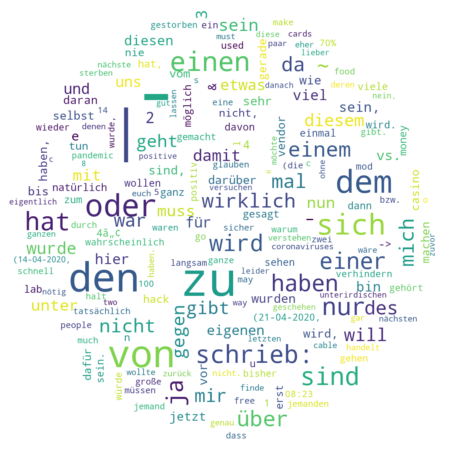

In [48]:
showWordCloud(covid_dict)